# Bayesian NNs

# Resources

Nice Examples:
1. https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html
2. https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825 


# Data Import an Preprocessing

In [1]:
import pandas as pd
import math as m

In [11]:
df=pd.read_csv("TestData\\800_CFB_xy.csv")
df

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,d1_plate,d4_plate,d2_plate,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,0,5896.042103,10183.791863,1189.025419,587.175975,3951.288982,16.589760,24.595059,15.124578,...,2463.710938,-1140.493774,eta_1_x,0.0,41.178042,9817.936523,245.655258,-3552.487061,eta_3_top,0.0
1,1,1,9783.893188,15582.253981,434.089655,668.134731,4157.543342,10.005126,15.433241,11.179018,...,4856.115234,-394.626953,eta_1_x,52.0,0.007260,14298.742188,4259.643555,-394.626953,eta_3_top,433.0
2,2,2,3518.491402,15074.031207,509.342737,453.005723,4833.272653,19.790377,21.281638,25.048946,...,181.202286,-2277.959229,eta_1_x,0.0,7.161654,12240.676758,181.202286,-4713.654297,eta_3_bot,0.0
3,3,3,8975.183339,9902.815547,562.704986,824.904330,2401.438242,29.192119,13.684717,22.211689,...,7866.090332,-514.815186,eta_4_x,0.0,5.194534,345.297424,5167.886230,-514.815186,eta_3_top,0.0
4,4,4,16489.511572,7005.396051,327.627067,969.488477,3949.666517,22.085964,26.958668,12.714832,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,9995,12009.791520,6576.097044,244.837150,871.359088,4352.899496,17.941201,22.823880,10.383476,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
9996,9996,9996,11473.186264,19974.765798,580.262817,1097.306805,3054.404916,23.501959,24.825286,10.970317,...,5527.402344,-536.469421,eta_1_x,0.0,2.858205,19615.966797,5527.402344,-536.469421,eta_3_top,0.0
9997,9997,9997,12348.741871,12955.096886,341.437874,1001.502650,4743.323288,25.924541,20.770351,20.757222,...,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
9998,9998,9998,2813.057115,15155.575996,728.721522,789.405448,2374.975151,23.676648,29.684194,13.563459,...,141.123795,-680.936523,eta_3_y,0.0,146.785267,8687.869141,342.938446,-2485.579102,eta_3_bot,0.0


In [12]:
df.columns

Index(['Unnamed: 0', 'ID', 'L', 'b1', 't_p', 't_w', 'h_w', 'd1_plate',
       'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls',
       'fcc', 'fsy', 's', 'beta', 'ecu', 'fsu', 'b2', 'alpha_l', 'l_sec',
       'b_sec1_b1', 'b_sec2_b1', 'b_sec1_b2', 'b_sec2_b2', 'h_S1_3', 'h_S7_9',
       'h_v', 'l_v', 'left_p', 'right_p', 'h_b', 'b_b', 'esu', 'h_G',
       'gamma_E', 'phi_k', 'q_Gl', 'b_Bs', 'Q_k', 'withMPCs', 'offsetmodeling',
       'mesh_size_factor', 'oo', 'uu', 'd3_plate', 'd2_walls', 'd3_walls',
       'eta_min_s', 'x_s', 'y_s', 'z_s', 'Location_s', 'GP_count_s',
       'eta_min_c', 'x_c', 'y_c', 'z_c', 'Location_c', 'GP_count_c'],
      dtype='object')

# BNN implementation acc. to source 2
https://towardsdatascience.com/from-theory-to-practice-with-bayesian-neural-network-using-python-9262b611b825


In [13]:
import numpy as np
from sklearn import datasets
import torch
import torch.nn as nn
import torch.optim as optim
import torchbnn as bnn
import matplotlib.pyplot as plt

#### Preprocess Data

In [14]:
#x_names = ['L', 'b1',  't_p', 't_w', 'h_w'] #5 important features
x_names = ['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 'fsy', 's', 'beta'] # all 16 features
y_names=['eta_min_c']

x_data=df[x_names]
x_tensor=torch.tensor(x_data.values, dtype=torch.float32)

y_data=df[y_names]
y_tensor = torch.tensor(y_data.values,dtype=torch.float32)


x_tensor

tensor([[ 5.8960e+03,  1.0184e+04,  1.1890e+03,  ...,  3.8795e+02,
          8.2077e-01, -7.5295e+00],
        [ 9.7839e+03,  1.5582e+04,  4.3409e+02,  ...,  3.2884e+02,
          6.2210e-01,  3.1590e+01],
        [ 3.5185e+03,  1.5074e+04,  5.0934e+02,  ...,  4.4043e+02,
          8.1841e-01,  2.1790e+01],
        ...,
        [ 1.2349e+04,  1.2955e+04,  3.4144e+02,  ...,  3.9124e+02,
          2.0324e-01,  2.3104e+01],
        [ 2.8131e+03,  1.5156e+04,  7.2872e+02,  ...,  3.4546e+02,
          5.8861e-01,  1.8550e+01],
        [ 5.9420e+03,  7.4182e+03,  1.1988e+03,  ...,  3.2273e+02,
          2.4128e-01,  2.5917e+01]])

In [15]:
# train, test split

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
print(x_train.shape)

print(x_train)
print(y_train)

torch.Size([8000, 16])
tensor([[ 7.5536e+03,  8.6083e+03,  1.0572e+03,  ...,  4.0840e+02,
          2.9789e-01,  1.5011e+01],
        [ 9.3190e+03,  9.8398e+03,  3.5877e+02,  ...,  4.1443e+02,
          4.3896e-01,  1.5888e+01],
        [ 1.1338e+04,  1.6920e+04,  6.8181e+02,  ...,  4.2840e+02,
          4.7375e-01, -3.3366e+01],
        ...,
        [ 1.1583e+04,  1.8034e+04,  2.7901e+02,  ...,  4.3890e+02,
          3.2974e-01,  2.9333e+01],
        [ 1.5804e+04,  1.8943e+04,  7.0222e+02,  ...,  3.2613e+02,
          7.5613e-01,  1.3776e+01],
        [ 2.5752e+03,  6.9678e+03,  9.4653e+02,  ...,  3.9370e+02,
          2.5782e-01,  3.3763e+01]])
tensor([[36.5824],
        [ 1.0775],
        [ 6.5255],
        ...,
        [ 0.0000],
        [ 2.7834],
        [45.0350]])


In [16]:
from sklearn.preprocessing import MinMaxScaler
import torch

# Convert tensors to numpy arrays
x_train_np = x_train.numpy()
x_val_np = x_val.numpy()

# Initialize the MinMaxScaler and fit it on the training data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_np)

# Scale the validation data using the same scaler
x_val_scaled = scaler.transform(x_val_np)

# Convert the scaled arrays back to tensors
x_train = torch.tensor(x_train_scaled, dtype=torch.float32)
x_val = torch.tensor(x_val_scaled, dtype=torch.float32)

print(x_train)
print(y_train)

tensor([[0.3470, 0.3299, 0.8572,  ..., 0.7227, 0.2474, 0.6501],
        [0.4574, 0.4023, 0.1587,  ..., 0.7629, 0.4237, 0.6589],
        [0.5836, 0.8189, 0.4818,  ..., 0.8560, 0.4672, 0.1663],
        ...,
        [0.5989, 0.8844, 0.0789,  ..., 0.9260, 0.2872, 0.7934],
        [0.8628, 0.9379, 0.5022,  ..., 0.1742, 0.8202, 0.6378],
        [0.0358, 0.2334, 0.7465,  ..., 0.6247, 0.1973, 0.8377]])
tensor([[36.5824],
        [ 1.0775],
        [ 6.5255],
        ...,
        [ 0.0000],
        [ 2.7834],
        [45.0350]])


### Setup and Train Model

In [10]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=1)
)


# model = nn.Sequential(
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1000),
#     nn.ReLU(),
#     bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
# )

In [11]:

mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
def weighted_mse_loss(predictions, targets, importance_range=(0, 5), high_weight=10):
    # Calculate the basic MSE loss
    basic_mse = (predictions - targets) ** 2

    # Apply a higher weight to errors within the specified range
    weights = torch.ones_like(targets)
    weights[(targets >= importance_range[0]) & (targets <= importance_range[1])] = high_weight

    # Calculate the weighted MSE loss
    weighted_mse = basic_mse * weights
    return weighted_mse.mean()

In [13]:
#initialize error tracking lists
mse_list=[]
custom_mse_list = []
rmse_list=[]

In [14]:
for step in range(2000):
    pre = model(x_train)

    mse = mse_loss(pre, y_train)
    mse_list.append(mse.item())
    rmse = torch.sqrt(mse)
    rmse_list.append(rmse.item())

    # Custom weighted MSE loss
    custom_mse = weighted_mse_loss(pre, y_train, importance_range=(0, 5), high_weight=10)
    custom_mse_list.append(custom_mse.item())

    kl = kl_loss(model)
    cost = rmse + kl_weight*kl
    cost_custom = custom_mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost_custom.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f, RMSE: %2.2f, wRMSE: %2.2f' % (mse.item(), kl.item(), rmse.item(), m.sqrt(custom_mse.item())))

- MSE : 28.02, KL : 1.10, RMSE: 5.29, wRMSE: 5.67


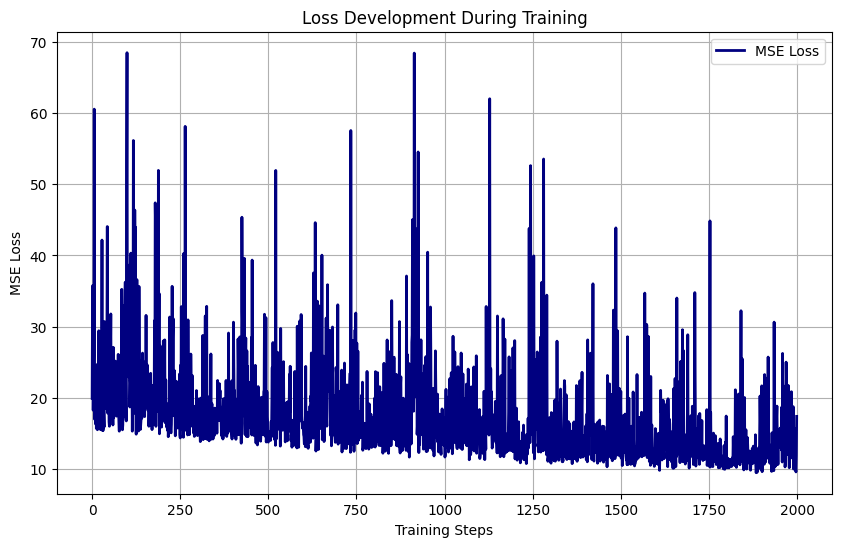

In [58]:
plt.figure(figsize=(10, 6))
plt.plot(mse_list, label='MSE Loss', color='navy', lw=2)
plt.title('Loss Development During Training')
plt.xlabel('Training Steps')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

In [25]:
## save model

name_training_run='Run1'
#saving just the weights and biases
#torch.save(model.state_dict(), 'trainedModels\\'+name_training_run+'.pth')

#saving the whole model
torch.save(model, 'trainedModels\\'+name_training_run+'.pth')

In [17]:
## load a model
name_training_run='Run1'
model = torch.load('trainedModels\\'+name_training_run+'.pth')
model

Sequential(
  (0): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=16, out_features=200, bias=True)
  (1): ReLU()
  (2): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200, bias=True)
  (3): ReLU()
  (4): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200, bias=True)
  (5): ReLU()
  (6): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=200, bias=True)
  (7): ReLU()
  (8): BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=200, out_features=1, bias=True)
)

### Model Evaluation

#### On the training data

In [21]:
# predicting 10 000 times 
models_result = np.array([model(x_train).data.numpy() for k in range(1000)])
models_result

array([[[45.077686  ],
        [ 2.331353  ],
        [ 9.311136  ],
        ...,
        [ 0.70881826],
        [ 3.110965  ],
        [54.646236  ]],

       [[47.917267  ],
        [ 2.2907953 ],
        [ 9.504671  ],
        ...,
        [ 0.6640574 ],
        [ 3.3690095 ],
        [56.24289   ]],

       [[47.588215  ],
        [ 1.6685857 ],
        [ 9.97836   ],
        ...,
        [ 0.73253196],
        [ 3.6235104 ],
        [56.28073   ]],

       ...,

       [[45.61028   ],
        [ 1.6985753 ],
        [ 8.251595  ],
        ...,
        [ 0.7743155 ],
        [ 3.2375054 ],
        [53.77306   ]],

       [[47.455803  ],
        [ 2.5001276 ],
        [ 9.670985  ],
        ...,
        [ 0.75893235],
        [ 4.12893   ],
        [59.400402  ]],

       [[45.142853  ],
        [ 2.2055526 ],
        [ 9.733845  ],
        ...,
        [ 1.0315799 ],
        [ 3.4656558 ],
        [55.70022   ]]], dtype=float32)

In [22]:
models_result = models_result[:,:,0]    
models_result = models_result.T #transpose--> each row corresponds to the predictions for a single data point across all 10000 iterations
#get mean predictions form each sample
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
#calculate standard derivation of prediction for each sample
std_values = np.array([models_result[i].std() for i in range(len(models_result))])


print('Mean Predictions: ',mean_values)
print('Standard Derivation of Predictions : ',std_values)

Mean Predictions:  [45.103493    1.9302229   8.4522915  ...  0.72592497  3.4101129
 54.940586  ]
Standard Derivation of Predictions :  [3.1163974  0.43534687 0.9947712  ... 0.13595387 0.63753694 3.1736572 ]


In [23]:
# calculate the RMSE of all training samples
mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)
mean_values_tensor

#Assuming y_val and y_pred are PyTorch tensors
# Calculate the squared differences
squared_diff = (y_train - mean_values_tensor) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

tensor([[72.6090],
        [ 0.7272],
        [ 3.7125],
        ...,
        [ 0.5270],
        [ 0.3928],
        [98.1203]])
Root Mean Squared Error (RMSE): 5.292848587036133


Text(0, 0.5, 'True $\\eta_{min},_{concrete}$')

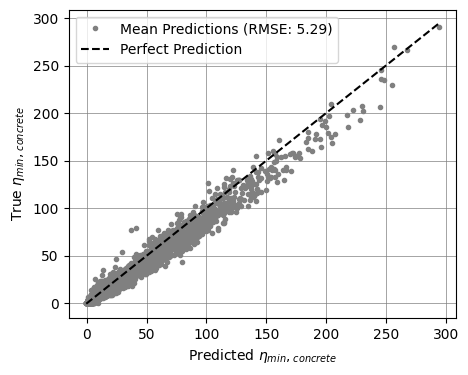

In [24]:
rmse_value=rmse.item()
x=torch.unsqueeze(x_train[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_train.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(y_pred,y_true,'.',color='gray',lw=3,label='Mean Predictions (RMSE: {:.2f})'.format(rmse_value))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 


# Determine the range for the x=y line
line_min = min(y_pred.min(), y_true.min())
line_max = max(y_pred.max(), y_true.max())
plt.plot([line_min, line_max], [line_min, line_max], 'k--', label='Perfect Prediction') 

# plt.ylim((0,5))
# plt.xlim((0,5))


plt.legend()
plt.xlabel('Predicted $\eta_{min},_{concrete}$')
plt.ylabel('True $\eta_{min},_{concrete}$')

In [25]:
# Define the range
lower_bound = 0
upper_bound = 5

# Create a mask for values within the specified range
mask = (y_train >= lower_bound) & (y_train <= upper_bound)

# Apply the mask
filtered_y_train = y_train[mask]
filtered_mean_values = mean_values_tensor[mask]

# Calculate the squared differences for the filtered samples
squared_diff = (filtered_y_train - filtered_mean_values) ** 2

# Calculate the mean of squared differences for the filtered samples
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE for the filtered samples
rmse = torch.sqrt(mean_squared_diff)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse.item())

# Print the number of samples within the specified range
print("Number of samples within range:", filtered_y_train.size(0))

Root Mean Squared Error (RMSE): 1.2367600202560425
Number of samples within range: 4283


Text(0, 0.5, 'True $\\eta_{min},_{concrete}$')

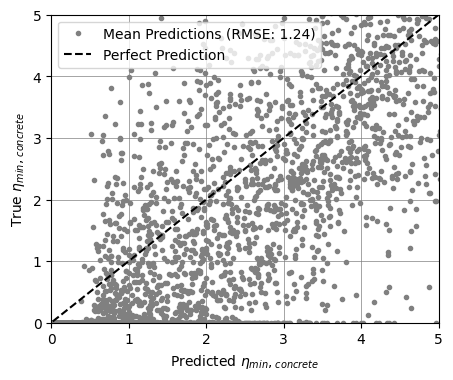

In [26]:
rmse_value=rmse.item()
x=torch.unsqueeze(x_train[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_train.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(y_pred,y_true,'.',color='gray',lw=3,label='Mean Predictions (RMSE: {:.2f})'.format(rmse_value))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 


# Determine the range for the x=y line
line_min = min(y_pred.min(), y_true.min())
line_max = max(y_pred.max(), y_true.max())
plt.plot([line_min, line_max], [line_min, line_max], 'k--', label='Perfect Prediction') 

plt.ylim((0,5))
plt.xlim((0,5))


plt.legend()
plt.xlabel('Predicted $\eta_{min},_{concrete}$')
plt.ylabel('True $\eta_{min},_{concrete}$')

#### on the validation data:

In [27]:
# predicting 10 000 times 
models_result = np.array([model(x_val).data.numpy() for k in range(1000)])
models_result

array([[[ 9.99589  ],
        [27.470724 ],
        [10.02117  ],
        ...,
        [ 1.3198819],
        [22.7418   ],
        [ 5.8554325]],

       [[ 6.5129375],
        [25.23407  ],
        [ 7.517715 ],
        ...,
        [ 0.8627441],
        [18.862288 ],
        [ 3.6552396]],

       [[ 7.667804 ],
        [25.420628 ],
        [ 8.259982 ],
        ...,
        [ 1.3230431],
        [20.940928 ],
        [ 4.4521847]],

       ...,

       [[ 5.5486097],
        [24.086027 ],
        [ 7.231658 ],
        ...,
        [ 1.0857587],
        [20.854572 ],
        [ 4.271351 ]],

       [[ 7.455899 ],
        [26.57709  ],
        [ 8.221829 ],
        ...,
        [ 1.3211942],
        [22.433126 ],
        [ 4.2517586]],

       [[12.33004  ],
        [23.717148 ],
        [ 8.314885 ],
        ...,
        [ 1.0520276],
        [18.433878 ],
        [ 4.223203 ]]], dtype=float32)

In [28]:
models_result = models_result[:,:,0]    
models_result = models_result.T #transpose--> each row corresponds to the predictions for a single data point across all 10000 iterations
#get mean predictions form each sample
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
#calculate standard derivation of prediction for each sample
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

In [29]:
#Assuming y_val and y_pred are PyTorch tensors

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)
mean_values_tensor
# Calculate the squared differences
squared_diff = (y_val - mean_values_tensor) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

Root Mean Squared Error (RMSE): 5.419253349304199


In [30]:
# x=torch.unsqueeze(x_val[:, 0], dim=1).data.numpy()
# y_pred=mean_values.reshape(-1,1)
# y_true=y_val.data.numpy()

# plt.figure(figsize=(10,8))
# plt.plot(x,y_pred,'.',color='navy',lw=3,label='Predicted Mean Model')
# #plt.fill_between(x_tensor.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
# #plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
# plt.plot(x,y_true,'.',color='darkorange',markersize=4,label='Test set')
# # plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
# # plt.ylim((-1,20))
# plt.legend()
# plt.xlabel('x')
# plt.ylabel('y')

Text(0, 0.5, 'True $\\eta_{min},_{concrete}$')

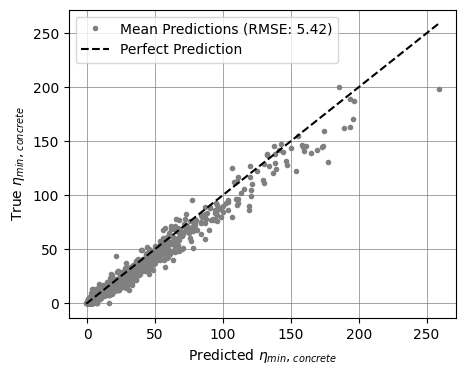

In [31]:
rmse_value=rmse.item()
x=torch.unsqueeze(x_val[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_val.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(y_pred,y_true,'.',color='gray',lw=3,label='Mean Predictions (RMSE: {:.2f})'.format(rmse_value))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 


# Determine the range for the x=y line
line_min = min(y_pred.min(), y_true.min())
line_max = max(y_pred.max(), y_true.max())
plt.plot([line_min, line_max], [line_min, line_max], 'k--', label='Perfect Prediction') 

# plt.ylim((0,5))
# plt.xlim((0,5))


plt.legend()
plt.xlabel('Predicted $\eta_{min},_{concrete}$')
plt.ylabel('True $\eta_{min},_{concrete}$')

In [32]:
# Define the range
lower_bound = 0.5
upper_bound = 5

# Create a mask for values within the specified range
mask = (y_val >= lower_bound) & (y_val <= upper_bound)

# Apply the mask
filtered_y_val = y_val[mask]
filtered_mean_values = mean_values_tensor[mask]

# Calculate the squared differences for the filtered samples
squared_diff = (filtered_y_val - filtered_mean_values) ** 2

# Calculate the mean of squared differences for the filtered samples
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE for the filtered samples
rmse = torch.sqrt(mean_squared_diff)

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse.item())

# Print the number of samples within the specified range
print("Number of samples within range:", filtered_y_val.size(0))

Root Mean Squared Error (RMSE): 1.4860012531280518
Number of samples within range: 412


Text(0, 0.5, 'True $\\eta_{min},_{concrete}$')

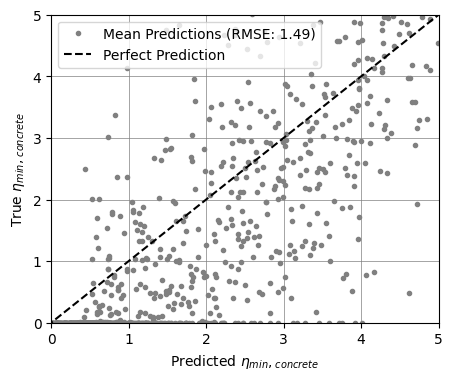

In [33]:
rmse_value=rmse.item()
x=torch.unsqueeze(x_val[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_val.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(y_pred,y_true,'.',color='gray',lw=3,label='Mean Predictions (RMSE: {:.2f})'.format(rmse_value))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 


# Determine the range for the x=y line
line_min = min(y_pred.min(), y_true.min())
line_max = max(y_pred.max(), y_true.max())
plt.plot([line_min, line_max], [line_min, line_max], 'k--', label='Perfect Prediction') 

plt.ylim((0,5))
plt.xlim((0,5))


plt.legend()
plt.xlabel('Predicted $\eta_{min},_{concrete}$')
plt.ylabel('True $\eta_{min},_{concrete}$')

#### on 1D parameter studies

In [18]:
#import validation data
df_1d_L=pd.read_csv("TestData\\601_CFB_xy.csv")
df_1d_L

,Unnamed: 0,ID,L,b1,t_p,t_w,h_w,alpha_l,h_v,l_v,...,y_s,z_s,Location_s,GP_count_s,eta_min_c,x_c,y_c,z_c,Location_c,GP_count_c
0,0,0,2000.000000,9720,400,400,2580,90,0,0,...,152.941177,-1943.225830,eta_1_x,0.0,17.977324,225.948547,152.941177,-2800.078125,eta_3_bot,0.0
1,1,1,2326.530612,9720,400,400,2580,90,0,0,...,152.941177,-1943.225830,eta_1_x,0.0,18.476377,225.948547,152.941177,-2800.078125,eta_3_bot,0.0
2,2,2,2653.061224,9720,400,400,2580,90,0,0,...,152.941177,-1943.225830,eta_1_x,0.0,20.813883,225.948547,152.941177,-2800.078125,eta_3_bot,0.0
3,3,3,2979.591837,9720,400,400,2580,90,0,0,...,152.941177,-1436.774170,eta_1_x,0.0,22.362935,225.948547,2426.650879,-579.921997,eta_3_bot,0.0
4,4,4,3306.122449,9720,400,400,2580,90,0,0,...,1167.826294,-352.941162,eta_1_x,0.0,17.915995,225.948547,1167.826294,-352.941162,eta_3_top,0.0
5,5,5,3632.653061,9720,400,400,2580,90,0,0,...,1933.610474,-352.941162,eta_1_x,0.0,13.299924,225.948547,1299.043579,-352.941162,eta_3_top,0.0
6,6,6,3959.183673,9720,400,400,2580,90,0,0,...,1651.727539,-352.941162,eta_1_x,0.0,8.274314,225.948547,1302.395386,-352.941162,eta_3_top,0.0
7,7,7,4285.714286,9720,400,400,2580,90,0,0,...,1421.881104,-352.941162,eta_1_x,0.0,7.271310,225.948547,1803.261963,-352.941162,eta_3_top,0.0
8,8,8,4612.244898,9720,400,400,2580,90,0,0,...,1541.366699,-352.941162,eta_1_x,0.0,5.755962,225.948547,1954.796265,-352.941162,eta_3_top,0.0
9,9,9,4938.775510,9720,400,400,2580,90,0,0,...,1660.852539,-352.941162,eta_1_x,0.0,4.860287,225.948547,1660.852539,-352.941162,eta_3_top,0.0


In [19]:
#x_names = ['L', 'b1',  't_p', 't_w', 'h_w'] #5 important features
# x_names = ['L', 'b1',  't_p', 't_w', 'h_w', 'd1_plate', 'd4_plate', 'd2_plate', 's_plate', 'd1_walls', 'd4_walls', 's_walls', 'fcc', 'fsy', 's', 'beta'] # all 16 features
# y_names=['eta_min_c']

x_data_1d=df_1d_L[x_names]
x_tensor_1d=torch.tensor(x_data_1d.values, dtype=torch.float32)

y_data_1d=df_1d_L[y_names]
y_tensor_1d = torch.tensor(y_data_1d.values,dtype=torch.float32)


x_tensor_1d.shape

torch.Size([50, 16])

In [20]:
## normalise imoirted data
# Convert tensors to numpy arrays
x_data_1d_to_scale = x_tensor_1d.numpy()


# Scale the validation data using the same scaler as for fitted for the trainings set
x_data_1d_scaled = scaler.transform(x_data_1d_to_scale)

# Convert the scaled arrays back to tensors
x_tensor_1d_scaled = torch.tensor(x_data_1d_scaled, dtype=torch.float32)


print(x_tensor_1d_scaled)
print(y_tensor_1d)

tensor([[-1.5102e-04,  3.9528e-01,  1.9992e-01,  1.9999e-01,  1.9331e-01,
          6.9999e-01,  7.0000e-01,  9.9963e-02,  2.5003e-01,  1.9986e-01,
          7.0003e-01,  2.4996e-01, -4.8822e-01,  5.9998e-01,  1.0224e-01,
          5.5002e-01],
        [ 2.0262e-02,  3.9528e-01,  1.9992e-01,  1.9999e-01,  1.9331e-01,
          6.9999e-01,  7.0000e-01,  9.9963e-02,  2.5003e-01,  1.9986e-01,
          7.0003e-01,  2.4996e-01, -4.8822e-01,  5.9998e-01,  1.0224e-01,
          5.5002e-01],
        [ 4.0675e-02,  3.9528e-01,  1.9992e-01,  1.9999e-01,  1.9331e-01,
          6.9999e-01,  7.0000e-01,  9.9963e-02,  2.5003e-01,  1.9986e-01,
          7.0003e-01,  2.4996e-01, -4.8822e-01,  5.9998e-01,  1.0224e-01,
          5.5002e-01],
        [ 6.1088e-02,  3.9528e-01,  1.9992e-01,  1.9999e-01,  1.9331e-01,
          6.9999e-01,  7.0000e-01,  9.9963e-02,  2.5003e-01,  1.9986e-01,
          7.0003e-01,  2.4996e-01, -4.8822e-01,  5.9998e-01,  1.0224e-01,
          5.5002e-01],
        [ 8.1501e-02

In [21]:
# predicting 10 000 times 
models_result = np.array([model(x_tensor_1d_scaled).data.numpy() for k in range(1000)])
models_result

array([[[ 2.4146738e+01],
        [ 2.3907965e+01],
        [ 2.2595161e+01],
        ...,
        [ 9.2219830e-02],
        [ 6.9537640e-02],
        [ 4.6855390e-02]],

       [[ 2.4609730e+01],
        [ 2.4384287e+01],
        [ 2.4017580e+01],
        ...,
        [ 2.7782136e-01],
        [ 2.5679731e-01],
        [ 2.3577338e-01]],

       [[ 2.2342958e+01],
        [ 2.2075987e+01],
        [ 2.1852249e+01],
        ...,
        [ 1.0402787e-01],
        [ 8.2388043e-02],
        [ 6.1074793e-02]],

       ...,

       [[ 2.5593485e+01],
        [ 2.5311853e+01],
        [ 2.5206709e+01],
        ...,
        [ 4.0953219e-02],
        [ 1.3506293e-02],
        [-1.3940573e-02]],

       [[ 2.5078550e+01],
        [ 2.4546152e+01],
        [ 2.3515938e+01],
        ...,
        [ 1.1794400e-01],
        [ 9.3065262e-02],
        [ 6.8186462e-02]],

       [[ 2.9317293e+01],
        [ 2.8947117e+01],
        [ 2.8373995e+01],
        ...,
        [ 1.9964969e-01],
        [ 1.803

In [22]:
models_result = models_result[:,:,0]    
models_result = models_result.T #transpose--> each row corresponds to the predictions for a single data point across all 10000 iterations
#get mean predictions form each sample
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
#calculate standard derivation of prediction for each sample
std_values = np.array([models_result[i].std() for i in range(len(models_result))])


print('Mean Predictions: ',mean_values)
print('Standard Derivation of Predictions : ',std_values)

Mean Predictions:  [2.5549856e+01 2.5024916e+01 2.4201292e+01 2.1722408e+01 1.8113562e+01
 1.5008158e+01 1.2786337e+01 1.1138799e+01 9.7574301e+00 8.4148083e+00
 7.1856494e+00 6.1949568e+00 5.4584246e+00 4.9262967e+00 4.5105796e+00
 4.1363592e+00 3.7640922e+00 3.3914461e+00 3.0158174e+00 2.6293700e+00
 2.2490389e+00 1.8960702e+00 1.5968635e+00 1.3514913e+00 1.1427642e+00
 9.6268833e-01 8.1456482e-01 7.0197588e-01 6.1944622e-01 5.6051773e-01
 5.1675165e-01 4.8151374e-01 4.5050135e-01 4.2144445e-01 3.9342898e-01
 3.6623740e-01 3.3932453e-01 3.1265569e-01 2.8620350e-01 2.5992700e-01
 2.3377566e-01 2.0775525e-01 1.8184604e-01 1.5599744e-01 1.3015875e-01
 1.0431998e-01 7.8464963e-02 5.2539583e-02 2.6509402e-02 3.8735222e-04]
Standard Derivation of Predictions :  [3.173854   3.09887    3.078051   3.1795244  2.8916144  2.2845192
 1.7644323  1.525205   1.5431877  1.5091194  1.2991139  1.0299447
 0.78353655 0.6064451  0.5124801  0.4822638  0.48333454 0.4948934
 0.52030134 0.54286075 0.5367784  

In [28]:
from model import RMSE

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)

rmse=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, verbalize=True)
print(rmse.item())

Root Mean Squared Error (RMSE): 2.088284730911255
2.088284730911255


In [30]:
from model import RMSE

mean_values_tensor = torch.tensor(mean_values).unsqueeze(1)
rmse=RMSE(y_pred=mean_values_tensor, y_true=y_tensor_1d, y_range=(0,5), verbalize=True)
print(rmse.item())

Root Mean Squared Error (RMSE): 1.1223950386047363
1.1223950386047363


Text(0, 0.5, '$\\eta_{c} min$')

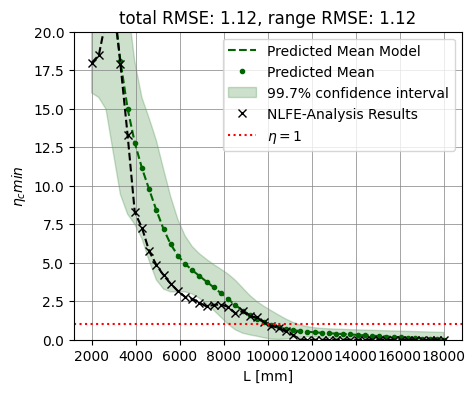

In [33]:
x=torch.unsqueeze(x_tensor_1d[:, 0], dim=1).data.numpy()
y_pred=mean_values.reshape(-1,1)
y_true=y_tensor_1d.data.numpy()

plt.figure(figsize=(5,4))
plt.plot(x,y_pred, linestyle='--',color='darkgreen',lw=1.5,label='Predicted Mean Model')
plt.plot(x,y_pred, '.',color='darkgreen',markersize=6,label='Predicted Mean')
plt.fill_between(x_tensor_1d.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='darkgreen',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x,y_true,linestyle='--',color='black',lw=1.5)
plt.plot(x,y_true,'x',color='black',markersize=6,label='NLFE-Analysis Results')

# Add a red dotted line at y=1
plt.axhline(y=1, color='r', linestyle=':', label='$\eta = 1$')
# plt.plot(x_tensor.data.numpy(),clean_target(x_tensor).data.numpy(),color='green',markersize=4,label='Target function')
plt.ylim((0,20))
plt.grid(color='gray', linestyle='-', linewidth=0.5) 
plt.legend()
plt.xlabel('L [mm]')
plt.title('total RMSE: {:.2f}, range RMSE: {:.2f}'.format(rmse.item(),rmse_range.item()))
plt.ylabel('$\eta_{c} min$')

### Example implementation

In [64]:
x = torch.linspace(-2, 2, 500)
y = x.pow(5) -10* x.pow(1) + 2*torch.rand(x.size())
x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)


In [65]:
model = nn.Sequential(
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1, out_features=1000),
    nn.ReLU(),
    bnn.BayesLinear(prior_mu=0, prior_sigma=0.1, in_features=1000, out_features=1),
)


In [66]:
mse_loss = nn.MSELoss()
kl_loss = bnn.BKLLoss(reduction='mean', last_layer_only=False)
kl_weight = 0.01

optimizer = optim.Adam(model.parameters(), lr=0.01)


In [67]:
for step in range(2000):
    pre = model(x)
    mse = mse_loss(pre, y)
    kl = kl_loss(model)
    cost = mse + kl_weight*kl
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
print('- MSE : %2.2f, KL : %2.2f' % (mse.item(), kl.item()))


- MSE : 1.10, KL : 11.09


In [68]:
x_test = torch.linspace(-2, 2, 300)
y_test = target(x_test)

x_test = torch.unsqueeze(x_test, dim=1)
y_test = torch.unsqueeze(y_test, dim=1)

In [69]:
models_result = np.array([model(x_test).data.numpy() for k in range(10000)])
models_result = models_result[:,:,0]    
models_result = models_result.T
mean_values = np.array([models_result[i].mean() for i in range(len(models_result))])
std_values = np.array([models_result[i].std() for i in range(len(models_result))])

Text(0, 0.5, 'y')

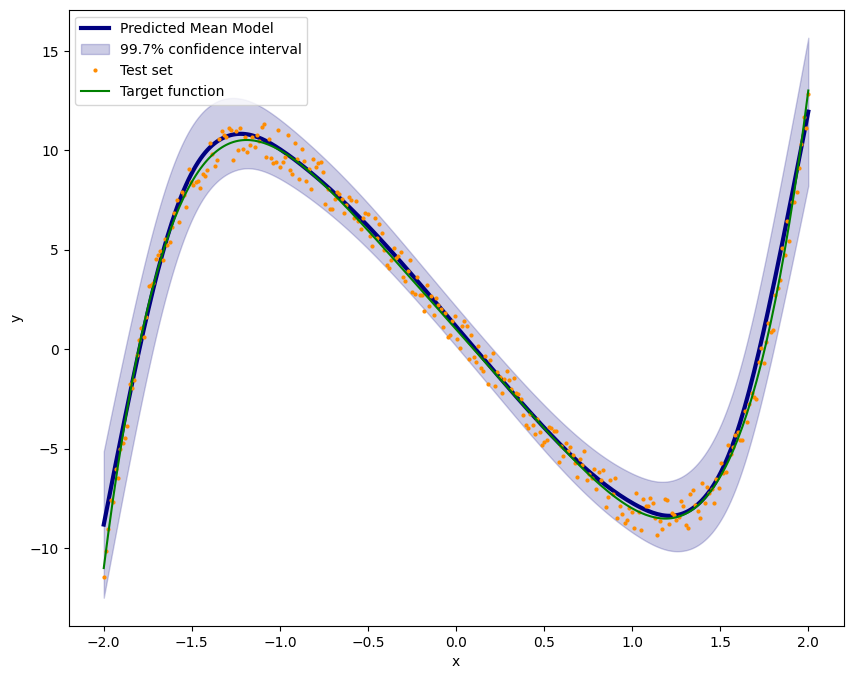

In [70]:
plt.figure(figsize=(10,8))
plt.plot(x_test.data.numpy(),mean_values,color='navy',lw=3,label='Predicted Mean Model')
plt.fill_between(x_test.data.numpy().T[0],mean_values-3.0*std_values,mean_values+3.0*std_values,alpha=0.2,color='navy',label='99.7% confidence interval')
#plt.plot(x_test.data.numpy(),mean_values,color='darkorange')
plt.plot(x_test.data.numpy(),y_test.data.numpy(),'.',color='darkorange',markersize=4,label='Test set')
plt.plot(x_test.data.numpy(),clean_target(x_test).data.numpy(),color='green',markersize=4,label='Target function')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# BNN implementation acc. To source 1
https://uvadlc-notebooks.readthedocs.io/en/latest/tutorial_notebooks/DL2/Bayesian_Neural_Networks/dl2_bnn_tut1_students_with_answers.html

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyro
import pyro.distributions as dist
from pyro.nn import PyroModule, PyroSample
import torch.nn as nn

In [ ]:
df=pd.read_csv("TestData\\800_CFB_xy.csv")
df

In [ ]:
x_names = ['L', 'b1',  't_p', 't_w', 'h_w']
y_names=['eta_min_c']

x_data=df[x_names]
x_tensor = torch.tensor(x_data.values).float().squeeze()
y_data=df[y_names]
y_tensor = torch.tensor(y_data.values).float().squeeze()
y_tensor

In [6]:
# #import and clean data
# x_names = ['L', 'b1',  't_p', 't_w', 'h_w',  'fcc', 'fsy', 'fsu', 'esu', 'd1_plate']
# #x_names=['L']
# y_names=['sf3']
# data=pd.concat([pd.read_csv("TestData\\5_CFBSamples.csv")[x_names], pd.read_csv("TestData\\SumRes_5.csv")[y_names]], axis=1)
# data=data[data['sf3']<100]
# #print(data.head())
# data.dropna(axis=0,inplace=True)
# x_data=data[x_names]
# x_tensor = torch.tensor(x_data.values).float().squeeze()
# y_data=data[y_names]
# y_tensor = torch.tensor(y_data.values).float().squeeze()
# # x_tensor[x_tensor.isnan()=='None']
# # x_tensor[0].type()
# print(data.head())

In [7]:
df['eta_min_c'].describe()

count    8001.000000
mean       15.079634
std        27.262112
min         0.000000
25%         0.000000
50%         4.209804
75%        15.477429
max       269.127526
Name: eta_min_c, dtype: float64

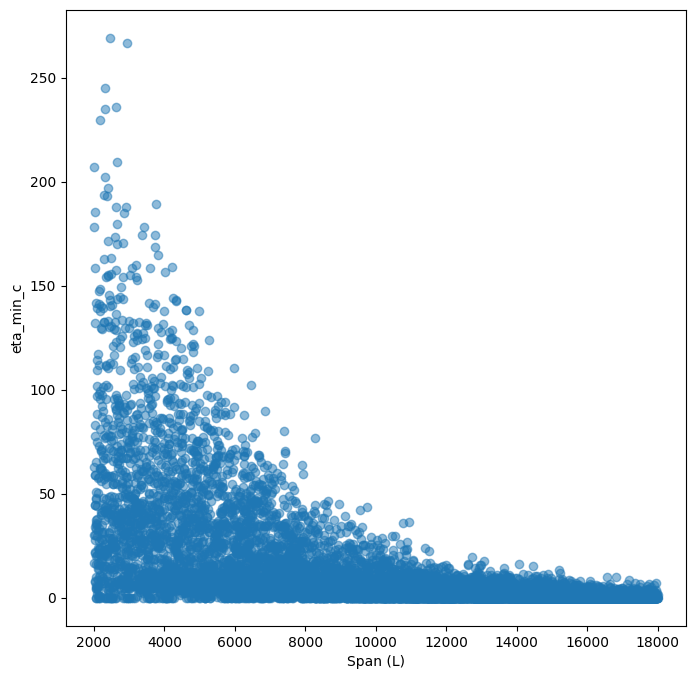

In [9]:
# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(x_data['L'], y_data, alpha=0.5)
plt.xlabel('Span (L)')
plt.ylabel('eta_min_c')
# plt.title('True vs Predicted Y Values')
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Perfect predictions line
plt.show()

In [10]:
# train, test split

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_tensor, y_tensor, test_size=0.2, random_state=42)
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)
print(x_train.shape)

print(x_train)
print(y_train)

torch.Size([6400, 5])
tensor([[ 4859.7729,  6306.4941,   897.4999,   436.2490,  4011.0386],
        [ 4358.8110,  8561.1074,   974.6630,   571.1037,  4524.8252],
        [ 3687.0498, 15295.9443,   500.5158,  1190.8981,  4822.6636],
        ...,
        [15804.3467, 18942.7617,   702.2180,  1041.2847,  4991.1489],
        [ 8262.1660, 10716.0693,   337.2525,  1119.7019,  2722.0759],
        [ 2575.2234,  6967.8379,   946.5286,   898.9583,  4197.2207]])
tensor([12.0225, 26.3039, 62.0504,  ...,  2.7834,  2.3306, 45.0350])


In [11]:
from sklearn.preprocessing import MinMaxScaler
import torch

# Convert tensors to numpy arrays
x_train_np = x_train.numpy()
x_val_np = x_val.numpy()

# Initialize the MinMaxScaler and fit it on the training data
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train_np)

# Scale the validation data using the same scaler
x_val_scaled = scaler.transform(x_val_np)

# Convert the scaled arrays back to tensors
x_train = torch.tensor(x_train_scaled, dtype=torch.float32)
x_val = torch.tensor(x_val_scaled, dtype=torch.float32)

In [12]:
mean = x_train.mean(dim=0)
print(mean)
std = x_train.std(dim=0)
print(std)
mean = y_train.mean(dim=0)
print(mean)
std = y_train.std(dim=0)
print(std)

tensor([0.4963, 0.4984, 0.4989, 0.4953, 0.5000])
tensor([0.2890, 0.2865, 0.2890, 0.2885, 0.2881])
tensor(14.9289)
tensor(27.1905)


In [13]:
# # Normalisation

# mean = x_train.mean(dim=0)
# std = x_train.std(dim=0)

# x_train_normalized = (x_train - mean) / std
# x_val_normalized = (x_val - mean) / std

# # Handling potential division by zero if a feature has constant value (std = 0)
# x_train_normalized[torch.isnan(x_train_normalized)] = 0
# x_val_normalized[torch.isnan(x_val_normalized)] = 0

In [14]:
class BNN(PyroModule):
    def __init__(self, in_dim=1, out_dim=1, hid_dim=10, n_hid_layers=5, prior_scale=5.):
        super().__init__()

        self.activation = nn.Tanh()  # could also be ReLU or LeakyReLU
        assert in_dim > 0 and out_dim > 0 and hid_dim > 0 and n_hid_layers > 0  # make sure the dimensions are valid

        # Define the layer sizes and the PyroModule layer list
        self.layer_sizes = [in_dim] + n_hid_layers * [hid_dim] + [out_dim]
        layer_list = [PyroModule[nn.Linear](self.layer_sizes[idx - 1], self.layer_sizes[idx]) for idx in
                      range(1, len(self.layer_sizes))]
        self.layers = PyroModule[torch.nn.ModuleList](layer_list)

        for layer_idx, layer in enumerate(self.layers):
            layer.weight = PyroSample(dist.Normal(0., prior_scale * np.sqrt(2 / self.layer_sizes[layer_idx])).expand(
                [self.layer_sizes[layer_idx + 1], self.layer_sizes[layer_idx]]).to_event(2))
            layer.bias = PyroSample(dist.Normal(0., prior_scale).expand([self.layer_sizes[layer_idx + 1]]).to_event(1))

    def forward(self, x, y=None):
        # x = x.reshape(-1, 1)
        x = self.activation(self.layers[0](x))  # input --> hidden
        for layer in self.layers[1:-1]:
            x = self.activation(layer(x))  # hidden --> hidden
        mu = self.layers[-1](x).squeeze()  # hidden --> output
        sigma = pyro.sample("sigma", dist.Gamma(.5, 1))  # infer the response noise

        # print("mu shape:", mu.shape)
        # print("sigma shape:", sigma.shape)
        # print("y shape:", y.shape)
        with pyro.plate("data", x.shape[0]):
            obs = pyro.sample("obs", dist.Normal(mu, sigma * sigma), obs=y)

        
        return mu

In [15]:
x_train.shape

torch.Size([6400, 5])

In [17]:
from pyro.infer import SVI, Trace_ELBO
from pyro.infer.autoguide import AutoDiagonalNormal
from tqdm.auto import trange
pyro.clear_param_store()

model = BNN(in_dim=5, out_dim=1, hid_dim=20, n_hid_layers=10, prior_scale=5.)
mean_field_guide = AutoDiagonalNormal(model)
optimizer = pyro.optim.Adam({"lr": 0.01})

svi = SVI(model, mean_field_guide, optimizer, loss=Trace_ELBO())
pyro.clear_param_store()

num_epochs = 2500
progress_bar = trange(num_epochs)


losses = []
for epoch in progress_bar:
    loss = svi.step(x_train, y_train)
    avg_loss = loss / x_train.shape[0]
    losses.append(avg_loss)
    progress_bar.set_postfix(loss=f"{loss / x_train.shape[0]:.3f}")

  0%|          | 0/2500 [00:00<?, ?it/s]

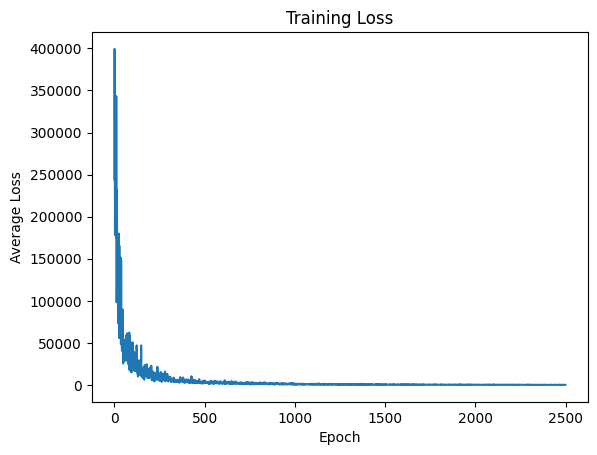

In [18]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Average Loss")
plt.show()

In [19]:
from pyro.infer import Predictive

predictive = Predictive(model, guide=mean_field_guide, num_samples=500)
preds = predictive(x_val)

In [20]:
preds['sigma']

tensor([[1.1387],
        [1.1396],
        [1.0537],
        [1.0545],
        [0.9933],
        [0.9864],
        [1.1812],
        [1.0925],
        [1.0206],
        [1.0973],
        [1.0593],
        [1.0245],
        [1.1559],
        [1.0641],
        [0.9827],
        [1.1196],
        [1.1723],
        [1.1153],
        [1.0074],
        [0.9714],
        [1.1682],
        [1.0342],
        [1.1417],
        [1.1538],
        [1.1378],
        [1.1198],
        [1.1077],
        [1.0728],
        [1.0587],
        [1.1470],
        [1.0126],
        [1.1252],
        [1.0757],
        [1.0677],
        [1.0231],
        [1.0941],
        [1.1728],
        [1.0911],
        [1.1290],
        [1.1591],
        [1.0608],
        [1.0037],
        [1.1054],
        [1.1662],
        [1.1060],
        [0.9675],
        [1.0544],
        [1.1336],
        [1.1854],
        [1.1258],
        [1.1037],
        [1.1795],
        [1.0055],
        [1.0497],
        [1.1803],
        [1

In [21]:
predicted_y_mean = preds['obs'].mean(0)
predicted_y_mean

tensor([ 1.5069,  1.6047,  1.3319,  ...,  4.5621, 11.8945,  1.2790])

In [23]:
# y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
# print(y_pred)
y_pred= preds['obs'][0]
print(y_pred)

tensor([ 3.0927,  3.6550,  4.2311,  ...,  4.8859, 16.8374,  6.1470])


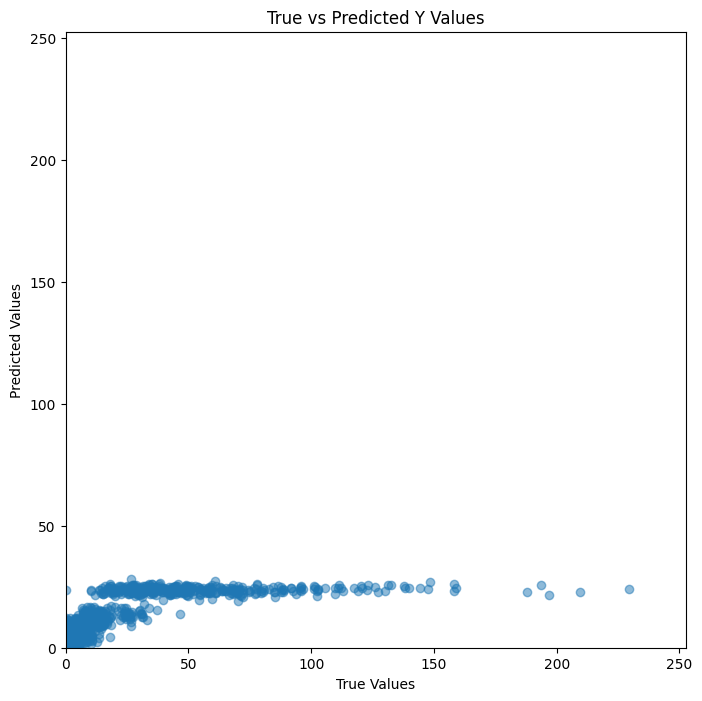

In [24]:
# Plot true vs predicted values
plt.figure(figsize=(8, 8))
plt.scatter(y_val, y_pred, alpha=0.5)
max_value = max(y_val.max(), y_pred.max())
min_value = min(y_val.min(), y_pred.min())
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Y Values')
plt.xlim(-0.1 * min_value, 1.1 * max_value)
plt.ylim(-0.1 * min_value, 1.1 * max_value)
#plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')  # Perfect predictions line
plt.show()

In [28]:
#Assuming y_val and y_pred are PyTorch tensors
# Calculate the squared differences
squared_diff = (y_val - y_pred) ** 2

# Calculate the mean of squared differences
mean_squared_diff = torch.mean(squared_diff)

# Calculate RMSE
rmse = torch.sqrt(mean_squared_diff)

print("Root Mean Squared Error (RMSE):", rmse.item())

Root Mean Squared Error (RMSE): 22.71416473388672


In [26]:
def plot_predictions(preds):
    y_pred = preds['obs'].T.detach().numpy().mean(axis=1)
    y_std = preds['obs'].T.detach().numpy().std(axis=1)

    fig, ax = plt.subplots(figsize=(10, 5))
    # xlims = [-0.5, 1.5]
    # ylims = [-1.5, 2.5]
    # plt.xlim(xlims)
    # plt.ylim(ylims)
    plt.xlabel("X", fontsize=30)
    plt.ylabel("Y", fontsize=30)

    #ax.plot(x_true, y_true, 'b-', linewidth=3, label="true function")
    ax.plot(x_train[:, 0] , y_train, 'ko', markersize=4, label="observations")
    ax.plot(x_train[:, 0], y_train, 'ko', markersize=3)
    ax.plot(x_val[:, 0], y_pred, '-', linewidth=3, color="#408765", label="predictive mean")
    ax.fill_between(x_val[:, 0], y_pred - 2 * y_std, y_pred + 2 * y_std, alpha=0.6, color='#86cfac', zorder=5)

    plt.legend(loc=4, fontsize=15, frameon=False)

In [42]:
x_train[:, 0]

tensor([0.3251, 0.5205, 0.1083,  ..., 0.3775, 0.6774, 0.4823])

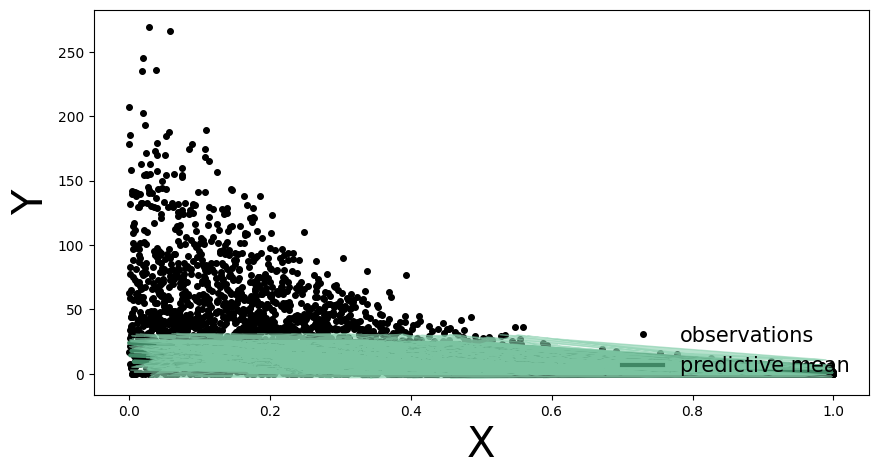

In [27]:
plot_predictions(preds)